- 1stFlrSF:	 First Floor square feet
- 2ndFlrSF:	 Second floor square feet
- 3SsnPorch:	 Three season porch area in square feet
- Alley:	 Type of alley access
- Bedroom:	 Number of bedrooms above basement level
- BldgType:	 Type of dwelling
- BsmtCond:	 General condition of the basement
- BsmtExposure:	 Walkout or garden level basement walls
- BsmtFinSF1:	 Type 1 finished square feet
- BsmtFinSF2:	 Type 2 finished square feet
- BsmtFinType1:	 Quality of basement finished area
- BsmtFinType2:	 Quality of second finished area (if present)
- BsmtFullBath:	 Basement full bathrooms
- BsmtHalfBath:	 Basement half bathrooms
- BsmtQual:	 Height of the basement
- BsmtUnfSF:	 Unfinished square feet of basement area
- CentralAir:	 Central air conditioning
- Condition1:	 Proximity to main road or railroad
- Condition2:	 Proximity to main road or railroad (if a second is present)
- Electrical:	 Electrical system
- EnclosedPorch:	 Enclosed porch area in square feet
- ExterCond:	 Present condition of the material on the exterior
- Exterior1st:	 Exterior covering on house
- Exterior2nd:	 Exterior covering on house (if more than one material)
- ExterQual:	 Exterior material quality
- Fence:	 Fence quality
- FireplaceQu:	 Fireplace quality
- Fireplaces:	 Number of fireplaces
- Foundation:	 Type of foundation
- FullBath:	 Full bathrooms above grade
- Functional:	 Home functionality rating
- GarageArea:	 Size of garage in square feet
- GarageCars:	 Size of garage in car capacity
- GarageCond:	 Garage condition
- GarageFinish:	 Interior finish of the garage
- GarageQual:	 Garage quality
- GarageType:	 Garage location
- GarageYrBlt:	 Year garage was built
- GrLivArea:	 Above grade (ground) living area square feet
- HalfBath:	 Half baths above grade
- - Heating:	 Type of heating
- HeatingQC:	 Heating quality and condition
- HouseStyle:	 Style of dwelling
- Id:	Observation Id
- Kitchen:	 Number of kitchens
- KitchenQual:	 Kitchen quality
- LandContour:	 Flatness of the property
- LandSlope:	 Slope of property
- LotArea:	 Lot size in square feet
- LotConfig:	 Lot configuration
- LotFrontage:	 Linear feet of street connected to property
- LotShape:	 General shape of property
- LowQualFinSF:	 Low quality finished square feet (all floors)
- MasVnrArea:	 Masonry veneer area in square feet
- MasVnrType:	 Masonry veneer type
- MiscFeature:	 Miscellaneous feature not covered in other categories
- MiscVal:	 $Value of miscellaneous feature
- MoSold:	 Month Sold
- MSSubClass:	 The building class
- MSZoning:	 The general zoning classification
- Neighborhood:	 Physical locations within Ames city limits
- OpenPorchSF:	 Open porch area in square feet
- OverallCond:	 Overall condition rating
- OverallQual:	 Overall material and finish quality
- PavedDrive:	 Paved driveway
- PoolArea:	 Pool area in square feet
- PoolQC:	 Pool quality
- RoofMatl:	 Roof material
- RoofStyle:	 Type of roof
- SaleCondition:	 Condition of sale
- SalePrice:	 the property's sale price in dollars. This is the target variable that you're trying to predict.
- SaleType:	 Type of sale
- ScreenPorch:	 Screen porch area in square feet
- Street:	 Type of road access
- TotalBsmtSF:	 Total square feet of basement area
- TotRmsAbvGrd:	 Total rooms above grade (does not include bathrooms)
- Utilities:	 Type of utilities available
- WoodDeckSF:	 Wood deck area in square feet
- YearBuilt:	 Original construction date
- YearRemodAdd:	 Remodel date
- YrSold:	 Year Sold


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn import ensemble,tree,linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
from IPython.display import display
pd.options.display.max_columns=None
df=df.reindex_axis(sorted(df.columns),axis=1)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,Gd,150,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,1,Gd,284,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,0,Gd,434,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,TA,540,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,Gd,490,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [4]:
df.shape

(1460, 81)

In [5]:
df.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtQual          object
BsmtUnfSF          int64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64
MoSold             int64


### Checking NAs

In [6]:
null_cols=df.columns[df.isnull().any()]
df[null_cols].isnull().sum()

Alley           1369
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
BsmtQual          37
Electrical         1
Fence           1179
FireplaceQu      690
GarageCond        81
GarageFinish      81
GarageQual        81
GarageType        81
GarageYrBlt       81
LotFrontage      259
MasVnrArea         8
MasVnrType         8
MiscFeature     1406
PoolQC          1453
dtype: int64

In [7]:
null_cols.value_counts().sum()

19

In [8]:
df=df.drop(null_cols,axis=1)

In [9]:
df.shape

(1460, 62)

In [10]:
df_obj=df.select_dtypes(include=['object']).copy()
obj_cols=df_obj.columns.values
for i in obj_cols:
    print()
    print(i)
    print(df_obj[i].value_counts())


BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

Exterior2nd
VinylSd    504
MetalSd

In [11]:
df=df.drop(obj_cols,axis=1)

In [12]:
df.shape

(1460, 35)

In [13]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LowQualFinSF,MSSubClass,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706,0,1,0,150,0,0,2,548,2,1710,1,1,1,8450,0,60,0,2,61,5,7,0,208500,0,8,856,0,2003,2003,2008
1,1262,0,0,3,978,0,0,1,284,0,1,2,460,2,1262,0,2,1,9600,0,20,0,5,0,8,6,0,181500,0,6,1262,298,1976,1976,2007
2,920,866,0,3,486,0,1,0,434,0,1,2,608,2,1786,1,3,1,11250,0,60,0,9,42,5,7,0,223500,0,6,920,0,2001,2002,2008
3,961,756,0,3,216,0,1,0,540,272,1,1,642,3,1717,0,4,1,9550,0,70,0,2,35,5,7,0,140000,0,7,756,0,1915,1970,2006
4,1145,1053,0,4,655,0,1,0,490,0,1,2,836,3,2198,1,5,1,14260,0,60,0,12,84,5,8,0,250000,0,9,1145,192,2000,2000,2008


In [14]:
df['TotalSF']=df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df['Age']=df['YrSold']-df['YearBuilt']

In [15]:
#drop_cols=['TotalBsmtSF','1stFlrSF','2ndFlrSF','YrSold','YearBuilt','GarageArea','TotRmsAbvGrd',
#           'YrSold','YearBuilt','YearRemodAdd','GrLivArea','BsmtFinSF1','BsmtFinSF2','WoodDeckSF','OpenPorchSF']
#df=df.drop(drop_cols,axis=1)

In [16]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LowQualFinSF,MSSubClass,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,Age
0,856,854,0,3,706,0,1,0,150,0,0,2,548,2,1710,1,1,1,8450,0,60,0,2,61,5,7,0,208500,0,8,856,0,2003,2003,2008,2566,5
1,1262,0,0,3,978,0,0,1,284,0,1,2,460,2,1262,0,2,1,9600,0,20,0,5,0,8,6,0,181500,0,6,1262,298,1976,1976,2007,2524,31
2,920,866,0,3,486,0,1,0,434,0,1,2,608,2,1786,1,3,1,11250,0,60,0,9,42,5,7,0,223500,0,6,920,0,2001,2002,2008,2706,7
3,961,756,0,3,216,0,1,0,540,272,1,1,642,3,1717,0,4,1,9550,0,70,0,2,35,5,7,0,140000,0,7,756,0,1915,1970,2006,2473,91
4,1145,1053,0,4,655,0,1,0,490,0,1,2,836,3,2198,1,5,1,14260,0,60,0,12,84,5,8,0,250000,0,9,1145,192,2000,2000,2008,3343,8


In [17]:
X=df[['TotalSF','Age','LotArea','FullBath','GarageCars']]
y=df['SalePrice']

### Log transformation for SalePrice

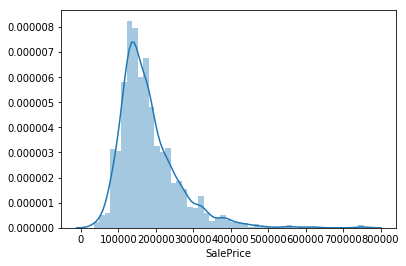

In [18]:
sns.distplot(y)

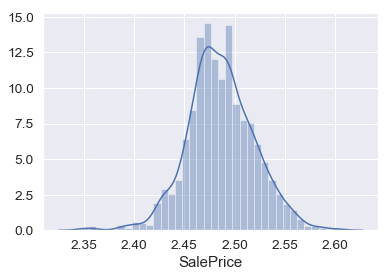

In [34]:
y=np.log(y)
sns.distplot(y)

### Standardize Numerical Features

In [20]:
X_nu=X[['TotalSF','Age','LotArea']]
X_nu=(X_nu-X_nu.mean())/X_nu.std()

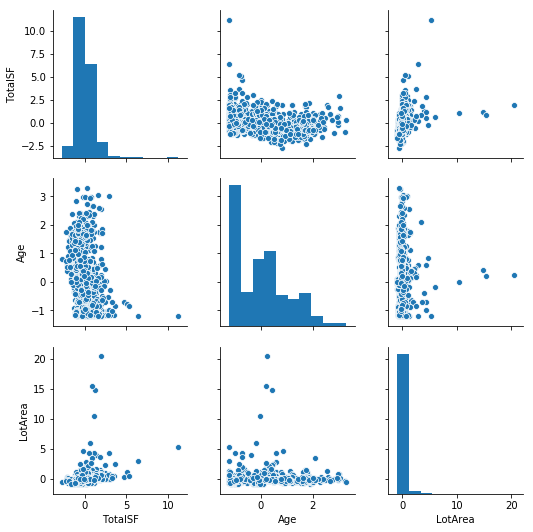

In [21]:
sns.pairplot(X_nu)

In [22]:
X[['TotalSF','Age','LotArea']]=X_nu[['TotalSF','Age','LotArea']]

In [23]:
X.head()

,TotalSF,Age,LotArea,FullBath,GarageCars
0,-0.001276,-1.042902,-0.207071,2,2
1,-0.052389,-0.183402,-0.091855,2,2
2,0.169099,-0.976787,0.073455,2,2
3,-0.114454,1.800059,-0.096864,1,3
4,0.944308,-0.943729,0.375020,2,3


In [24]:
#sns.set()
#cols=df.columns
#sns.pairplot(df[cols],size=2.5)
#plt.show()

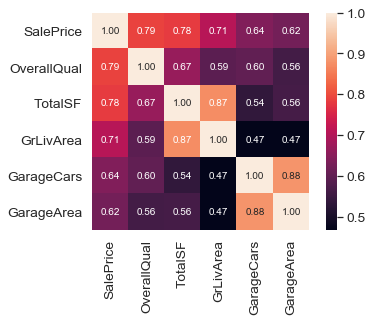

In [25]:
from sklearn import preprocessing
corrmat=df.corr()
k=6
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=200)

In [27]:
#from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with Logistic regression
#from sklearn.linear_model import LogisticRegression
#logreg=LogisticRegression()
#cross_val_score(logreg,x_train,y_train,cv=10).mean()

In [28]:
from sklearn.linear_model import ElasticNetCV
ENSTest = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                       l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train, y_train)

In [29]:
y_pred=ENSTest.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.19467981851006083

In [30]:
y_pred=ENSTest.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.22707750239988908

In [31]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                           min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)

In [32]:
y_pred=GBest.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.10957399390827419

In [33]:
y_pred=GBest.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.19409445909352854